<a href="https://colab.research.google.com/github/shitote/dist-repo/blob/main/neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow.

A Classification problem is when you try to classify a class to be one thing or another.
A few types of classification problem:
* Binary classification.
* malticlass classification.
* Multylabel classification.

## The typical architecture of a neural network for classification problem.
1. imput layer shape
2. Hidden layes  - this ranges from one to infinity.
3. Neurals per hidden layer  - it is ussualy problem specific.
4. Out put layer - one class or the other.
5. Hidden activation - Usualy ReLU (rectified linear unit)
6. Output activation - sigmoid, softmax.
7. Loss function - Cross entropy.
8. Optimizer - SGD (stocastic gradient descent), Adam.

### Create the data to view and fit.

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create circles.
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check the freatures
x[0]

array([0.75424625, 0.23148074])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({'x0': x[:, 0], 'x1': x[:, 1], 'label': y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


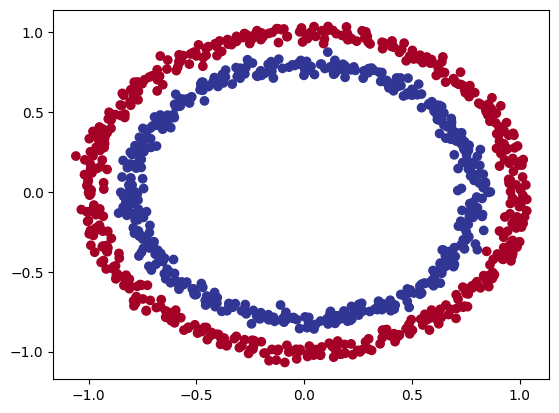

In [5]:
 # Visualize with a plot
 import matplotlib.pyplot as plt
 plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Imput and the outut shape

In [6]:
len(x), len(y)

(1000, 1000)

In [7]:
# View the first example of feature and labels
x[11], y[11]

(array([0.5694666 , 0.84476776]), 0)

### Stemps in modeling

In [8]:
# make the importation of tensorflow.
import tensorflow as tf

# Set the random see
tf.random.set_seed(42)

# Create a sequential mode.
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Time to comple our model_1.
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])
# Fit the model_1 with the training and the test data nin this case x and y.
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 5.8744 - accuracy: 0.4690
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7305 - accuracy: 0.4970
Epoch 3/5
32/32 [==============================] - 0s 7ms/step - loss: 7.7305 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 7.7304 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 7.7304 - accuracy: 0.4970


In [9]:
## Improve the model by training for longer
model_1.fit(x, y, epochs=200, verbose=0)

In [10]:
model_1.evaluate(x, y)

32/32 [==============================] - 0s 4ms/step - loss: 7.7132 - accuracy: 0.4990


[7.713211536407471, 0.49900001287460327]

since the model is working on a binary classification proble, and the model scores an accracy of 50 % ...The model is performing as if it is **Guessing**

In [11]:
 # Improve the model by adding one hidden layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
 ])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['accuracy'])

model_2.fit(x, y, epochs=100, verbose=0)

In [12]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932466626167297, 0.5]

##Improve the classification model.

In [13]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [14]:
# training model 3.
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model.
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model.
model_3.fit(x, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.5090


[0.6957343220710754, 0.5090000033378601]



```
# This is formatted as code
```

Crate a functionto visualize the models prediction.
* Take ina trained model, features(x) and (Y)
* Create a meshgrid of the different X values.
* Make predictions accross the meshgrid.
* Plot the predictions as well as line between zones (where each unque class falls)

In [16]:
import numpy as np

def plot_decision_boundary(model, x, y):
  '''
  Plots the decision boundary created by a model predicting on x.
  '''

  #  Defin the axis boundaries of the plots and create a meshgrid.
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x values
  x_in = np.c_[xx.ravel(), yy.ravel()]  # c. stack 2d arrays together.

  # Maken predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing a multiclass classification')

    # Reshape the predictions to make them ready for plotting.
    y_pred = np.argmax(y_pred, axis=1).Reshape(xx.shape)

  else:
    print('doing a binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary.
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing a binary classification


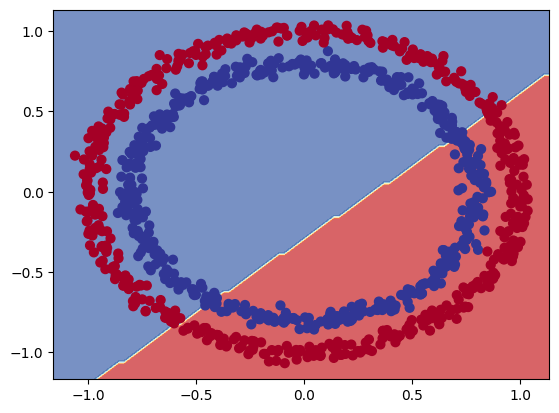

In [17]:
plot_decision_boundary(model=model_3, x=x, y=y)

In [18]:
# let's see if our model can be used for a rigression probelm.

tf.random.set_seed(42)

# Create a regression dataset
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into training and test set.
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [19]:
# Re-create the model to fit the problem
tf.random.set_seed(42)

x_reg_train = np.reshape(x_reg_train, (x_reg_train.shape[0], 1))

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

model_3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 385.8777 - mae: 385.8777
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 306.3224 - mae: 306.3224
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 228.6597 - mae: 228.6597
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 146.8851 - mae: 146.8851
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 64.1246 - mae: 64.1246
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 60.8710 - mae: 60.8710
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 72.5049 - mae: 72.5049
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 56.0245 - mae: 56.0245
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.7745 - mae: 43.7745
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 48.6765 - mae: 48.6765
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


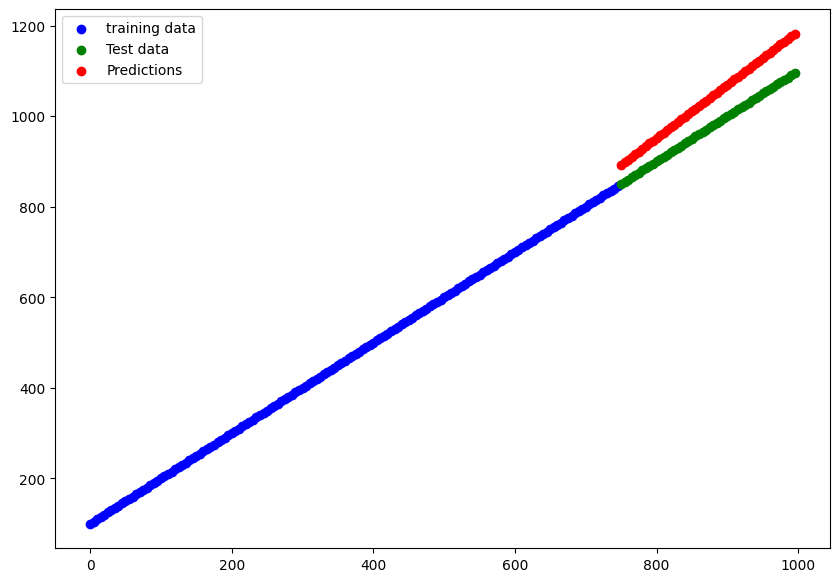

In [20]:
# make Predictions with our trained model.
import matplotlib.pyplot as plt

y_reg_preds = model_3.predict(x_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label= "training data")
plt.scatter(x_reg_test, y_reg_test, c = 'g', label= 'Test data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label= 'Predictions')
plt.legend()

In [21]:
### The missing piece: Non-linearity

In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

# Compile the model.
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# fit a historical model
history = model_4.fit(x, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4485 - accuracy: 0.4720
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4185 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4057 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3969 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3513 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2886 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2707 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2577 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2286 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2264 - accuracy: 0.4730
Epoch 11/

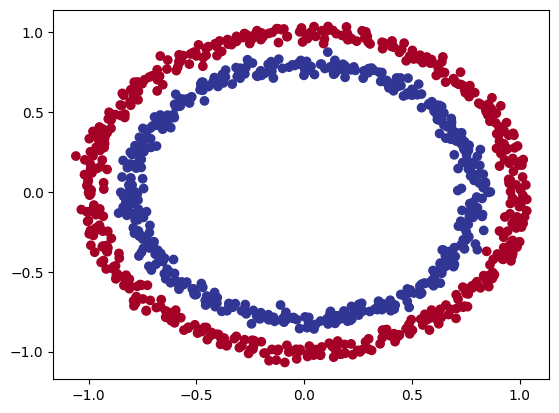

In [23]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing a binary classification


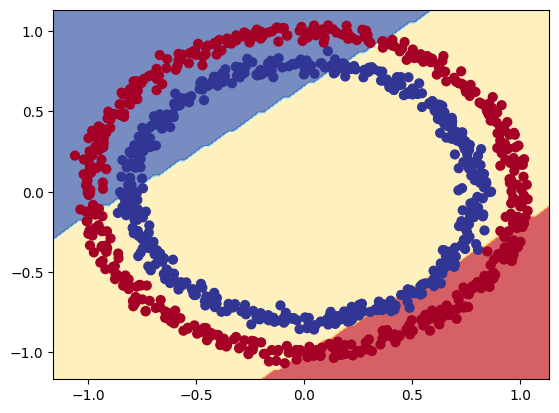

In [24]:
# check the decision boundary
plot_decision_boundary(model_4, x=x, y=y)

In [25]:
# split the data into training and testing set.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train)

800

In [51]:
# create a random seed
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model.
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr= 0.01),
                metrics=['accuracy'])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7098 - accuracy: 0.4837
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4613
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4588
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4913
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.4938
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.4925
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5075
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5100
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5188
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5350
Epoch 11/25
25/25 [

In [52]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.9250


[0.5422477126121521, 0.925000011920929]

313/313 [==============================] - 0s 1ms/step
doing a binary classification


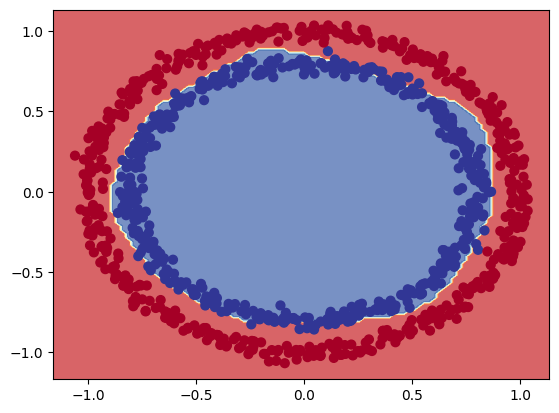

In [53]:
plot_decision_boundary(model_8, x, y)

313/313 [==============================] - 0s 1ms/step
doing a binary classification
313/313 [==============================] - 0s 1ms/step
doing a binary classification


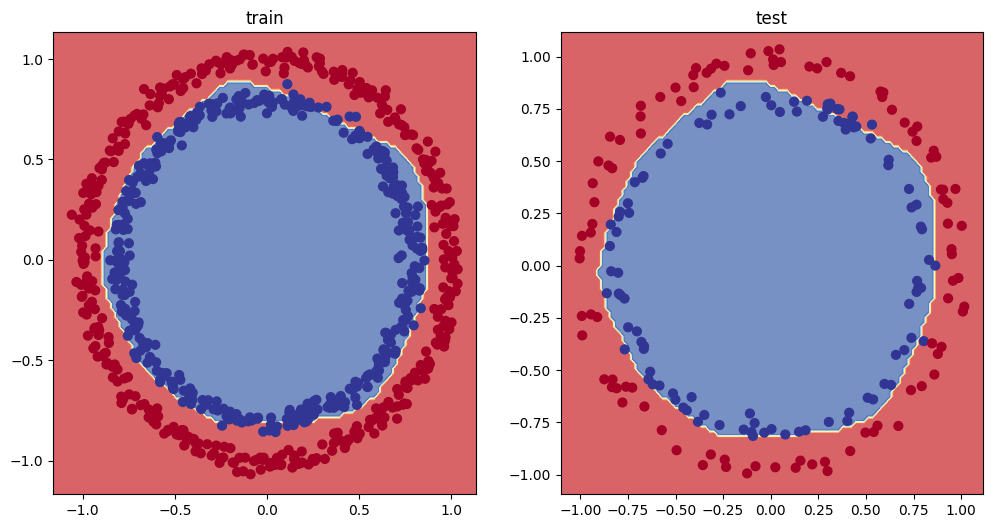

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_8, x=x_test, y=y_test)
plt.show()

In [55]:
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 20)                60        
                                                                 
 dense_26 (Dense)            (None, 20)                420       
                                                                 
 dense_27 (Dense)            (None, 1)                 21        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.709810,0.48375
1,0.699129,0.46125
2,0.693958,0.45875
3,0.691696,0.49125
4,0.689285,0.49375
5,0.686879,0.49250
6,0.684508,0.50750
7,0.682110,0.51000
8,0.680391,0.51875
9,0.677521,0.53500


Text(0.5, 1.0, 'Model_8 loss curve')

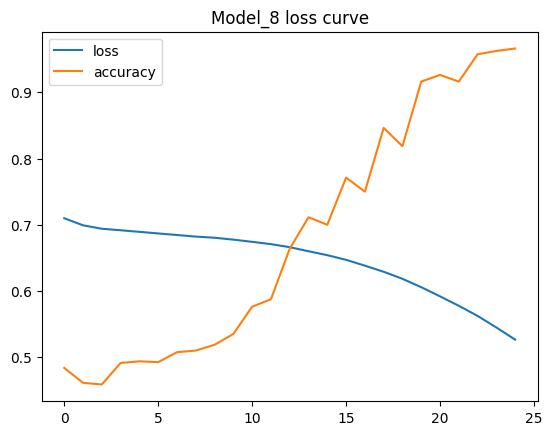

In [57]:
 pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curve')

### FInding the best Learning rate.
* A learning rate **callback**
* modified loss vurves plot.

In [72]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss = 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(lr = 0.01),
                metrics=['accuracy'])

# create a learining rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model(passing lr_scheduler callback)
history_9 = model_9.fit(x_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6908 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5075 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

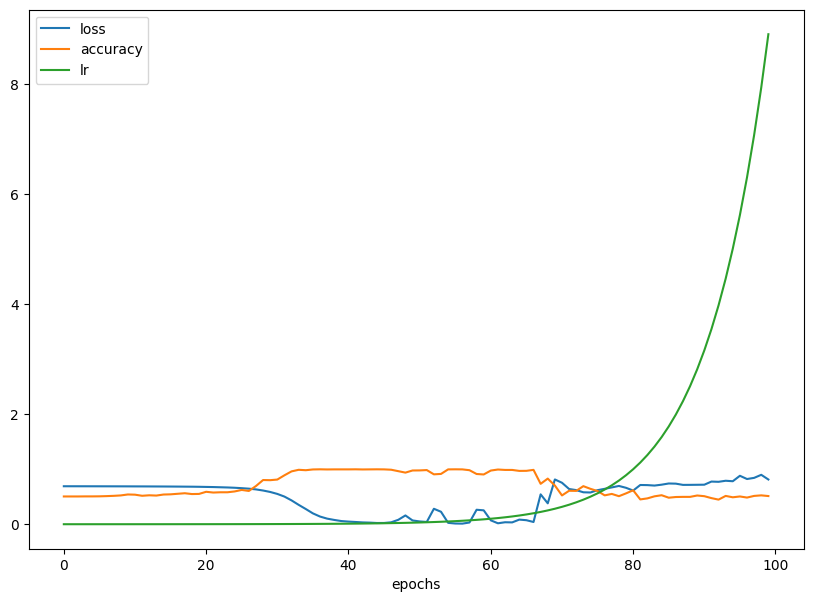

In [74]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

Text(0.5, 1.0, 'learning rate vs loss')

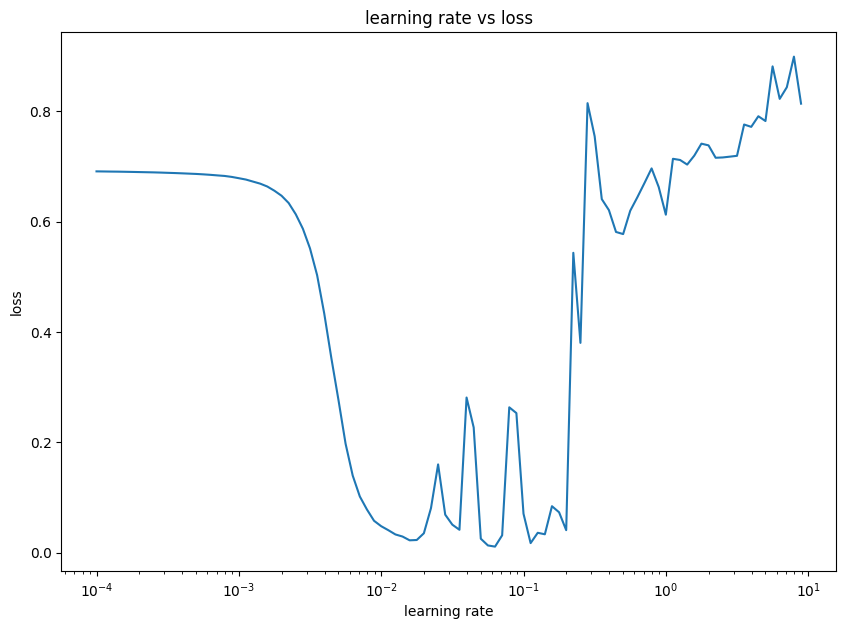

In [78]:
# comapare the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title("learning rate vs loss")

In [82]:
# us a higher learning rate for the model_9
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

model_10.fit(x_train, y_train, epochs=25)



Epoch 1/25
25/25 [==============================] - 3s 6ms/step - loss: 0.6891 - accuracy: 0.5175
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.5412
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.5462
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6414 - accuracy: 0.6475
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.6787
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7437
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.8012
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.8612
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3013 - accuracy: 0.9025
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.9287
Epoch 11/25
25/25 [

In [83]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 1s 4ms/step - loss: 0.0527 - accuracy: 0.9800


[0.052654165774583817, 0.9800000190734863]

In [85]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.1277 - accuracy: 1.0000


[0.12767355144023895, 1.0]

313/313 [==============================] - 0s 1ms/step
doing a binary classification
313/313 [==============================] - 0s 1ms/step
doing a binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

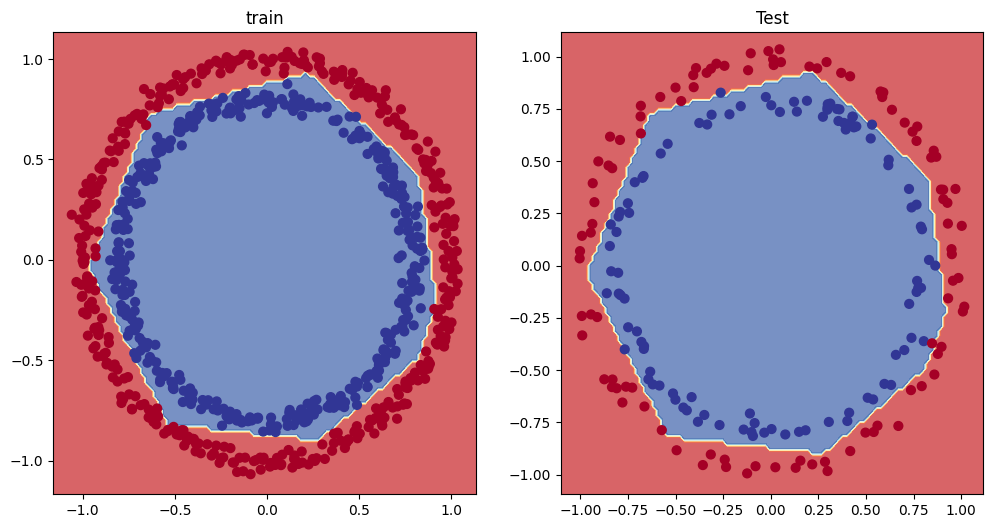

In [86]:
# plot the decition boundary for model 10
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, x=x_test, y=y_test)
plt.show

## More classification evaluation methods.
Alongside visualizing our models results as mach as possible there are a handful of other classification evaluation methods that one need to be familiar with
* Accuracy
* precision
* Recall
* F1_score
* confusion metrix
* classification report from sklearn

In [87]:
# Check the accuracy of out model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f'model loss on the test dataset: {loss}')
print(f'model accuracy on the test dataset: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9800
model loss on the test dataset: 0.052654165774583817
model accuracy on the test dataset: 98.00%
